(tema:1)=
# Theme 1: The Gradient Method

In this Theme project we will be investigating the _gradient method_ (also called the _gradient descent algorithm_ or the _steepest decent method_), which is a method or algorithm for determination of extremum (maximum or minimum) of a function of multiple variables. The method is used in many engineering-related contexts when dealing with optimization, such as for the training of artificial intelligence in machine learning.

In many engineering problems one needs to either minimize or maximize a given scalar function $f : \mathbb{R}^n \to \mathbb{R}$ of $n$ variables. The minimum value (if such exists) can be written as $\min \{f(\pmb{x}) | \pmb{x} \in \mathbb{R}^n \}$, meaning the smallest value within the image/range, $\min \mathrm{im}(f)$. Let us call the minimum value $A \in \mathbb{R}$. Often one is not interested in the function value itself (that is, the minimum value) but rather in the vector $\pmb{x}^\dagger$ for which (or where) the function *achieves* this minimum values: $f(\pmb{x}^{\dagger}) = A$. This is also the case in this Theme exercise.

For the training of neural networks one often needs to find minima of functions of **many** variables. For example, with ChatGPt+ one computes with 10 billion variables. We will limit our scope to functions of two variables, since many of the problems that arrive during the search for minima appear already here.

> Tip:
> You should start the theme exercise by downloading the exercises as a "Jupyter Notebook" `.ipynb` file. You do this by clicking the arrow ![Arrow](./download_pil.png) above. You can then open the theme exercise directly in VS Code.

## Minimum or Maximum?

### Question a
Assume that we have an algorithm or a method that can find the minimum of a function, meaning $\pmb{x}^\dagger$ such that $f(\pmb{x}^{\dagger}) = A$. We are now being asked to find the *maximum value* of a function $g : \mathbb{R}^n \to \mathbb{R}$, meaning $g(\pmb{x}^{\dagger}) = B$ where $B:=\max \mathrm{im}(g)$. How will you start on this task? 

*Hint: How can one alter the $g$ function such that a maximum value becomes a minimum value?*

With this settled we now only have to consider the optimization problem where we have to find *minimum* values. In general functions can have several points with a minimum, but we will only consider functions that have exactly *one point* $\pmb{x}^{\dagger}$ such that $f(\pmb{x}^{\dagger}) = A$, where $A$ is the minimum value of the image.

## The Test Functions

In [1]:
# We import the usual libraries and set the printing setting
from dtumathtools import *
from sympy import *
init_printing()

In [2]:
%matplotlib inline 
# or use qt or notebook

We consider the following three functions of the form $f_i: \mathbb{R}^2 \to \mathbb{R}$:

\begin{align*}
f_1(x_1,x_2) &= a x_{1}^{2} + x_{2}^{2} \\
f_2(x_1,x_2) &= q(x_1,x_2) \\
f_3(x_1,x_2)  &= (1-x_{1})^{2}+100(x_{2}-x_{1}^{2})^{2}
\end{align*}
where $a$ and $\lambda_1$ are *positive* real numbers and a quadratic form $q$ is defined in the Python code below. The function $f_1$ is also a (very simple) quadratic form, while the function $f_3$ is a *fourth-degree* polynomial. All functions have a minimum (but no maximum since they grow infinitely).

In [3]:
# Variables and parameters that appear in the functions
x1, x2 = symbols('x1 x2', real=True)
a, lambda1 = symbols('a lambda1',  positive=True)

In [4]:
def f1(x1, x2, a = 0.5):
    return a * x1**2 + 1 * x2**2

def f2(x1, x2, lambda1 = 0.5):
    Q = 1/sqrt(2) * Matrix([[1,1],[1,-1]])
    A = Q.T * Matrix([[lambda1,0],[0,1]]) * Q
    b = Matrix([-2,4])
    x = Matrix([x1,x2])
    q = x.T * A * x + x.T * b
    return q[0] 

def f3(x1, x2):
    return (1 - x1)**2 + 100*(x2 - x1**2)**2

The functions $f_1$ and $f_2$ depend on, respectively, the parameters $a$ and $\lambda_1$. The default values of the parameters are written in each `def` line above. We can call functions as follows:

In [5]:
f1(x1,x2), f1(x1,x2,2), f1(x1,x2,a)

And likewise we can see that the $f_3$ function actually is a fourth-degree polynomial in $x_1$ and $x_2$:

In [6]:
f3(x1,x2).expand()

### Question b

Explain why the following commands give the same output:

In [7]:
f1(1, 2), f1(1, 2, 0.5)

## Visualization

The Functions can be plotted as follows:

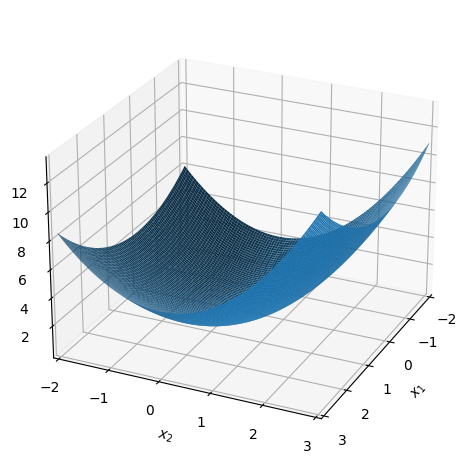

In [8]:
dtuplot.plot3d(f1(x1,x2,0.5), (x1,-2,3), (x2,-2,3), camera = {"elev": 25, "azim": 25})

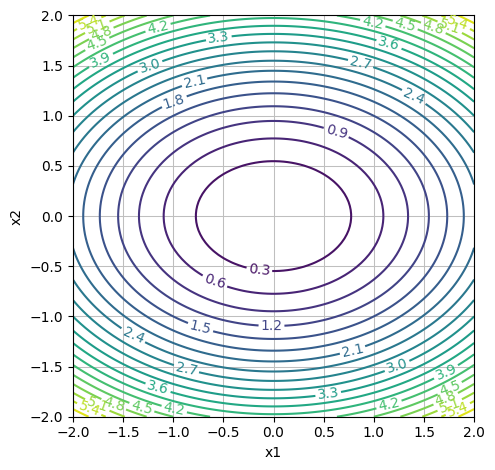

In [9]:
# "levels": 20 is the number of contour lines
dtuplot.plot_contour(f1(x1,x2,0.5), (x1,-2,2), (x2,-2,2), rendering_kw = {"levels": 20}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

It is useful to be able to determine precisely which level curves that are being plotted. Here we are plotting:

In [10]:
[0.1, 0.5, *range(1,10,1)]

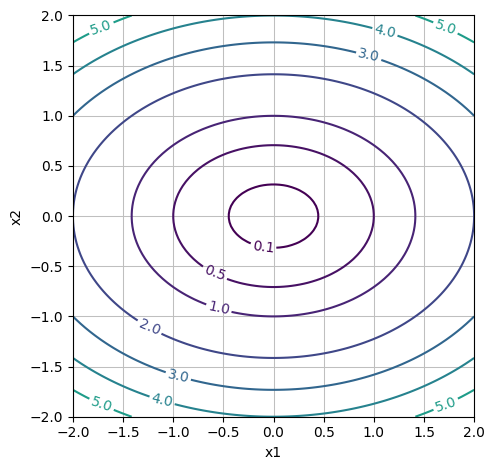

In [11]:
# "levels": [0.1, 0.5, *range(1,10,1)] is the values of the contour lines
dtuplot.plot_contour(f1(x1,x2,0.5), (x1,-2,2), (x2,-2,2), rendering_kw = {"levels": [0.1, 0.5, *range(1,10,1)]}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

### Question c

Plot the three functions for different values of the parameters $a$ and $\lambda_1$. Remember that they must be *positive* numbers. You must at least plot the three functions with the default values of $a$ and $\lambda_1$, but you should also try to see what happens with the level curve shapes, when $a$ and $\lambda_1$ for instance become very small (or larger) quantities such as $0.01$. Your plots should illustrate where the functions have their minima, and you must thus adjust both the intervals for $x_1$ and $x_2$ as well as which level curves that are being plotted.

### Question d

The function $f_3$ is called the banana function. Can you find a level curve that looks like a banana? State a function value of $f_3$ that gives something that looks like a banana level curve. It should be one coherent curve - not two curves.

### Question e

For one of the three functions it is rather easy to guess/read from the plot a minimum. Which, and where is the minimum $\pmb{x}^\dagger$?

## The Gradient Vector

### Question f

Compute the gradient vector of all functions. As a check you can use SymPy, where we in order to compute $\nabla f_1$ call:

In [12]:
nf1 = dtutools.gradient(f1(x1,x2,a),(x1,x2))
nf1

⎡2⋅a⋅x₁⎤
⎢      ⎥
⎣ 2⋅x₂ ⎦

We now let $a = 0.5$ until something else is mentioned.

### Question g

Plot for $a=0.5$ the gradient vector of $f_1$ as a vector field $\mathbb{R}^2 \to \mathbb{R}^2$ along with the level curves of $f_1$. 

*Hint: See the Python demo from week 1.*

### Question h

The gradient vector spans the direction in which "the function decreases and increases the most". But does the gradient vector point in the direction in which the function decreases or increases?

### Question i

Find a parametrization $\pmb{r}(t)$ of the level curves of $\{(x_1, x_2) \in \mathbb{R}^2 | f_1(x_1,x_2) =c \}$ for *each* value of $c \in ]0,\infty[$. Remember that $a=1/2$. 

*Hint*: 1) The level curves are ellipses, whose semi-axes depend on $\sqrt{c}$. 2) The vector function $\pmb{r}(t) = (1 \sin(t), 2 \cos(t))$ for $t \in [0, 2 \pi]$ parameterizes ellipses centred at $(0,0)$ with semi-axes $1$ and $2k$.

### Question j

Let $\pmb{x}_0 = (1,2)$. Compute $f_1(\pmb{x}_0)$ and state the parametric representation $\pmb{r}(t)$ of the level curve that passes through $\pmb{x}_0$. Determine the $t_0$ value where $\pmb{r}(t_0) = (1,2)$. Find the tangent vector $\pmb{r}'(t_0)$ at the point $\pmb{x}_0$. Compute the gradient vector at the point and show that $\pmb{r}'(t_0)$ and $\nabla f_1(1,2)$ are orthogonal.

*Hint*: $t_0$ satisfies the equation $\cos(t_0) = 1/3$. (If you cannot get through the exercise, move on to the next tasks and return to this question later. The result from this exercise is not used in the following.)

## Step-Wise Gradient Direction for $f_1$

We consider the point $\pmb{x}_0 = (1,2)$ as our starting guess. We will now attempt to use information about the gradient vector $\nabla f_1$ for iteratively finding the minimum point of $f_1$. In each step we will move in the direction of the gradient vector. Since we wish to make the value of $f_1(1,2)$ smaller, we must move in the direction of $-\nabla f_1(\pmb{x}_0)$, meaning in the negative gradient direction. We first define the gradient vector as a Python function:

In [13]:
def nf1(x1, x2, a = 0.5):
    return Matrix([2*a*x1, 2*x2])   # The gradient, computet earlier

In [14]:
x_0 = Matrix([1,2])
nf1(*x_0)     # * Just means that the x_0 vector is split into two arguments

⎡1.0⎤
⎢   ⎥
⎣ 4 ⎦

We must decide how far we dare move in the direction of the gradient vector. We first try to move $25\%$ of the gradient vector length. This is called the *step length*, since we imagine taking a step in the negative gradient direction:

In [15]:
x_1 = x_0 - 0.25 * nf1(*x_0)
x_1

⎡0.75⎤
⎢    ⎥
⎣1.0 ⎦

We repeat this procedure a few times.

In [16]:
x_2 = x_1 - 0.25 * nf1(*x_1)
x_3 = x_2 - 0.25 * nf1(*x_2)
x_0, x_1, x_2, x_3

⎛⎡1⎤  ⎡0.75⎤  ⎡0.5625⎤  ⎡0.421875⎤⎞
⎜⎢ ⎥, ⎢    ⎥, ⎢      ⎥, ⎢        ⎥⎟
⎝⎣2⎦  ⎣1.0 ⎦  ⎣ 0.5  ⎦  ⎣  0.25  ⎦⎠

### Question k

Repeat the procedure at least 10 times. Do we arrive at the minimum point $\pmb{x}^{\dagger}$? What is the gradient vector at the minimum point? Try making the step length 0.25 larger and smaller. The step length $\alpha = 0.5$ is special for our starting guess. What happens?

We can collect the above into the following iterative method:
\begin{equation*} 
  \pmb{x}_{\text{next}} = \pmb{x}_{\text{current}} - \alpha \nabla f(\pmb{x}_{\text{current}})
\end{equation*}
where $\alpha > 0$ denote the step length and $f$ is the function we wish to minimize. In machine learning and artificial intelligence, $\alpha$ is called _the learning rate_.

We can of course also write the above method as:
\begin{equation*} 
  \pmb{x}_{n+1} = \pmb{x}_{n} - \alpha \nabla f(\pmb{x}_{n})
\end{equation*}
where $n = 0,1,2, \dots$ and $\pmb{x}_{0}$ denote our starting guess.

###  Question l

What is the distance between $\pmb{x}_{n}$ and $\pmb{x}_{n+1}$? Your answer must be a formula containing $\alpha, \nabla f(\pmb{x}_{n})$ and the norm in $\mathbb{R}^2$.

### Question m

Finish the following code such that the output becomes $\pmb{x}_{100}$ with starting guess $\pmb{x}_{0}=(1,2)$ and learning rate $\alpha = 0.1$:

In [17]:
alpha = 0.25
x = Matrix([1,2])
for n in range(100):
    x = # one line of code missing
x

SyntaxError: invalid syntax (3198201554.py, line 4)

## The Gradient Method: Implementation and Further Investigations

We now want to implement a general gradient method that works for all functions (where we can compute their gradient) and that automatically will stop when the gradient vector becomes small or a maximal number of iterations have been reached. 

The gradient method described as an algorithm:
1. Initialization parameters ($\pmb{x}_0$, $\alpha$, tolerance, max. iterations $n_\text{max}$).
1. Update step: $\pmb{x}_{n+1} \leftarrow \pmb{x}_{n} - \alpha \nabla f(\pmb{x}_{n})$ and $n \leftarrow n + 1$.
1. Finishing criteria: $||\nabla f(\pmb{x}_{\text{current}})|| \le \text{tolerance}$ or $n = n_\text{max}$.
1. Output: $\pmb{x}_n$ and $n$ for an $n \le n_\text{max}$ where the finishing criteria is met.

In [ ]:
def gradient_method (f, x_0, alpha = 0.01, tol = 0.0001, n_max = 5000):
    nf = dtutools.gradient(f, (x1,x2))
    x = x_0
    nfx = nf.subs({x1: x[0], x2: x[1]})     # the gradient vector at x_0
    n = 0
    while nfx.norm() > tol and n < n_max:
#       x =   # one line of code missing
#       nfx = # one line of code missing
#       n =   # one line of code missing
#       print(x)                           # uncomment to see the iterations
    return x, n

gradient_method(f1(x1,x2,0.5), Matrix([1,2]), 0.1)

### Question n

Complete the code above. We are only missing code in three lines. The code block should give the output:  

$\displaystyle \left( \left[\begin{matrix}9.40461086986004 \cdot 10^{-5}\\5.92855496895059 \cdot 10^{-9}\end{matrix}\right], \  88\right)$

What does this output mean?

### Question o

Remove `#` in front of `print(x)` and run the code again. What do you see?

### Question p

Carry out the gradient method for $f_1$ for $a = 0.5$ and $a = 0.01$ with the following values: `x_0 = Matrix([1,10])`, `alpha = 0.1`, `tol = 1e-4`, `nmax = 5000`. Why does the algorithm converge much more slowly for $a = 0.01$? By convergence we here simply refer to the steps in the gradient method until it stops. (It can be useful to add `#` in front of `print(x)` again in `gradient_method`, but this is optional).

*Hint*: Which way does the gradient vector point when $a$ becomes small?

### Question q

We have used different `alpha` values above, but which should we actually use? This is not an easy question to answer, and it very much depends on the usecase (the function we are optimizing!). Ask a Chatbot like ChatGPT the following question: "Which learning rate should I use for the gradient method?". If th Chatbot's answer is very long and you don't want to read that much text, then ask it to provide a briefer answer.

### Question r

For the functions $f_1$ and $f_2$ one can choose a high step length/learning rate $\alpha$ (though, not above 1; try!), but one must often choose the learning rate $\alpha$ as $0.1$, $0.01$ or even $0.001$. 
This applies for example for the $f_3$ functions where $\alpha$ must be chosen to be small. The task is to find the minimum point $\pmb{x}^{\dagger}$ of the function. Look back at your plots of the function to come up with a good starting guess.  


### Question s (optional)

Here is a small competition: Find the minimum of the following $f_4$ function. You may write your best bid on a minimum point (along with the function value) in the discussion forum Ed (see link in Learn).

In [ ]:
def f4(x1, x2):
    return (sqrt(3) - x1)**2 + sqrt(pi)*74*(x2 - x1**2)**2 + sqrt(pi)

### Question t (Optional)

Write a Python program that plots the path we are moving along with the gradient method. To do this you must plot the list of points $\pmb{x}_0, \pmb{x}_1,\pmb{x}_2,\pmb{x}_3,\pmb{x}_4, \dots$ (connected with straight lines). The path should be plotted on top of a plot of the level curves. Test your program for $f_1, f_2$ and $f_3$.

### Question u (optional)

For the training of neural networks a variant of the gradient method is often used, which is called the stochastic gradient descent method, in short SGD. Investigate on your own (make a Google search, ask a chatbot, look up in a book or the like) what this method does differently. Explain the difference in your own words.